Keras 可以用各種不同的深度學習套件當底層，我們在此指定用 Tensorflow 以確保執行的一致性

In [1]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#### MNIST
-------------
Modified 版NIST數據庫（原來版有更多資料），為一堆 0 ~ 9 的手寫數字圖庫，擁有六萬筆訓練資料和一萬筆測試資料  
MNIST 是 Deep Learning 最有名的範例，Deep Learning Master &rarr; Hinton 稱為 ' 機器學習的果蠅 '

In [3]:
from keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
len(x_train)

60000

In [6]:
x_train[9487].shape

(28, 28)

In [7]:
x_train[9487]  #皆在 0 ~ 255 間 &rarr; 0 是白色, 255 是黑色

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

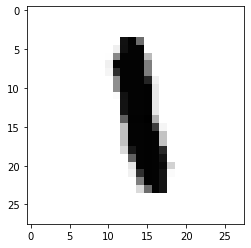

In [8]:
plt.imshow(x_train[9487],cmap = 'Greys')

In [9]:
y_train[9487]

1

In [10]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [11]:
from keras.utils import np_utils

In [12]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD   #notice tensorflow.keras.optimizers #

In [14]:
model = Sequential() #空的神經網路

In [15]:
model.add(Dense(500,input_dim = 784))    #第一個隱藏層有五百神經元
model.add(Activation('sigmoid'))

In [16]:
model.add(Dense(500))                   #第二個隱藏層也有五百神經元，共兩層隱藏層
model.add(Activation('sigmoid'))

In [17]:
model.add(Dense(10))                    #最後輸出有0123456789共 10 個神經元
model.add(Activation('softmax'))

In [18]:
model.compile(loss = 'mse', optimizer = SGD(learning_rate = 0.1), metrics = ['accuracy'])     
#mse = mean_squared_error
#SGD = 隨機梯度下降優化器 
#模型名稱.compile(loss = 損失函數, optimizer = 訓練模型, metrics = 評分標準)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
activation (Activation)      (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
__________________________________________________

In [20]:
#392500

784*500+500

392500

In [21]:
#250500

500*500+500

250500

In [22]:
#5010

500*10+10

5010

In [23]:
model.fit(x_train, y_train, batch_size = 100, epochs = 20)  #batch_size = 一次訓練幾筆資料, epochs = 一共訓練幾次

Epoch 1/20
600/600 [==============================] - 8s 12ms/step - loss: 0.0835 - accuracy: 0.3571
Epoch 2/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0643 - accuracy: 0.6171
Epoch 3/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0465 - accuracy: 0.7635
Epoch 4/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0342 - accuracy: 0.8236
Epoch 5/20
600/600 [==============================] - 8s 13ms/step - loss: 0.0264 - accuracy: 0.8705 0s - loss: 0.0265 - ac
Epoch 6/20
600/600 [==============================] - 8s 13ms/step - loss: 0.0217 - accuracy: 0.8885
Epoch 7/20
600/600 [==============================] - 7s 12ms/step - loss: 0.0189 - accuracy: 0.8972
Epoch 8/20
600/600 [==============================] - 7s 12ms/step - loss: 0.0170 - accuracy: 0.9049
Epoch 9/20
600/600 [==============================] - 9s 14ms/step - loss: 0.0156 - accuracy: 0.9104
Epoch 10/20
600/600 [==============================] - 10s 16ms/step - 

In [30]:
from ipywidgets import interact_manual

In [42]:
predict = model.predict(x_test)
predict = np.argmax(predict,axis = 1)

#原因很简单，两次训练时，网络结构不同。
#第一次用的网络是在model=Sequential()下添加模块的的方法，也就是所谓的顺序模型。
#Sequential class可以使用model.predict_classes()的方法来实现预测；
#第二次用的方法，是编写好网络结构后使用model=Model()综合起来的方法，也就是Model class，无法使用model.predict_classes()
#但是可以使用组合形式预测



In [43]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28, 28), cmap = 'Greys')
    print('神經網路判斷為：', predict[測試編號])

In [44]:
interact_manual(test, 測試編號 = (0, 9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

In [45]:
model_json = model.to_json()
open('手寫辨識.json','w').write(model_json)
model.save_weights('手寫辨識.h5')